# Случайные события. Случайные величины
Олег Булыгин

2023-07-18

In [30]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### Модуль **random** библиотеки **numpy**

In [2]:
# генерируем дискретную величину от 1 до 5
np.random.randint(1, 5)

4

In [4]:
# генерируем массив случайных дискретных величин (длина массива равна 100)
np.random.randint(1, 5, 100)

array([3, 4, 4, 3, 2, 3, 1, 2, 1, 4, 3, 2, 4, 4, 1, 4, 4, 1, 4, 1, 3, 1,
       2, 4, 2, 2, 1, 1, 4, 3, 1, 4, 4, 4, 1, 1, 3, 2, 3, 1, 4, 3, 1, 1,
       2, 2, 3, 3, 4, 4, 2, 1, 4, 3, 3, 1, 4, 1, 2, 2, 4, 1, 4, 2, 4, 1,
       1, 1, 3, 3, 2, 4, 3, 3, 3, 4, 4, 1, 3, 4, 2, 2, 1, 1, 3, 1, 4, 3,
       2, 3, 3, 1, 4, 2, 3, 1, 3, 4, 1, 4])

In [6]:
# генерируем массив случайных непрерывных величин от 0 до 1 (длина массива равна 10)
np.random.random(10)

array([0.65488515, 0.58446078, 0.37908938, 0.31599475, 0.55775781,
       0.80240392, 0.17892334, 0.24646084, 0.91777166, 0.93281001])

In [7]:
# генерируем случайную непрерывную величину от 1 до 5
np.random.uniform(1, 5)

4.859613249885565

In [8]:
# генерируем массив случайных непрерывных величин от 1 до 5 (длина массива равна 10)
np.random.uniform(1, 5, 10)

array([4.91423192, 2.34033233, 3.00045419, 3.80298756, 1.81735756,
       2.63917314, 2.25427083, 2.91843396, 1.93257356, 3.74333867])

In [13]:
# фиксируем состояние генератора случайных величин
np.random.seed(42)
# результат выполнения следующей команды будет всегда одинаковым
np.random.randint(1, 5, 10)

array([3, 4, 1, 3, 3, 4, 1, 1, 3, 2])

### Задача 1.
- Оценить вероятность того, что на игральной кости выпадет больше 4 очков.
- Сравнить с теоретической вероятностью.

**метод Монте-Карло** заключается в многократном повторении (моделировании) опыта и вычислении **частоты** события **А** - доли "успешных" опытов, в которых происходит сбытие А. При большом повторении опыта **частота близка к вероятности**

In [22]:
trials = 1000000 # Количество попыток
successes = 0 # Количество успехов

for i in range(trials):
    random_score = np.random.randint(1, 7) # Случайное количество очков от 1 до 6
    if random_score > 4:
        successes += 1

p_monte_carlo = successes / trials  # вероятность (частота) из моделирования
p = 2 / 6  # Теоретическая вероятность

print(successes, trials, p_monte_carlo, p)

333395 1000000 0.333395 0.3333333333333333


### Задача 1А (опциональная)
Дан квадрат, в который вписан круг(касаясь сторон квадрата). В квадрат случайным образом попадают точки. Какова вероятность, наугад взятая точка попадет в круг?

*Подсказка:* Удобно взять квадрат со стороной 2 и отсчитывать координаты точек от его центра.

In [25]:
trials = 1000000 # Количество попыток
successes = 0 # Количество успехов

for i in range(trials):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if (x ** 2 + y ** 2) <= 1:
        successes += 1

p_monte_carlo = successes / trials
print(p_monte_carlo, p_monte_carlo * 4, math.pi)

0.785969 3.143876 3.141592653589793


### Задача 2
Моделируем стрельбу по мишени

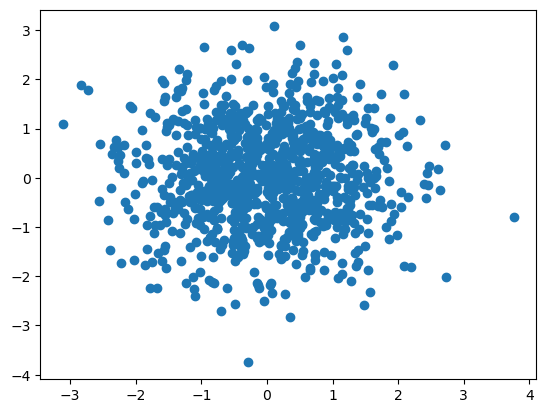

In [29]:
shots = 1000 # Количество выстрелов
std_dev = 1 # Стандартное отклонение

x = np.random.normal(0, std_dev, shots)
y = np.random.normal(0, std_dev, shots)

plt.scatter(x, y)

### Задача 3
Графически определить распределение измеренных значений физическо виличины, когда измерительный прибор имеет случайную погрешность.

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/data.log', sep=' ')['az']

In [36]:
data.head()

0   -9.632765
1   -9.632765
2   -9.643887
3   -9.691793
4   -9.702534
Name: az, dtype: float64

In [37]:
data.describe()

count    1040.000000
mean       -9.797112
std         0.087958
min       -10.030373
25%        -9.866481
50%        -9.800747
75%        -9.727398
max        -9.570811
Name: az, dtype: float64

<Axes: >

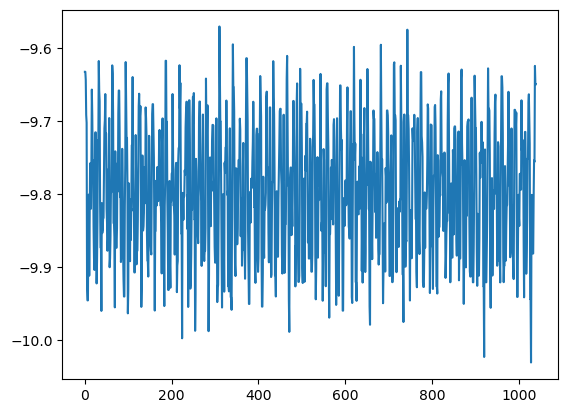

In [38]:
data.plot()

In [39]:
uni = np.random.uniform(min(data), max(data), 10000)
normal = np.random.normal(np.mean(data), np.std(data, ddof=1), 10000)

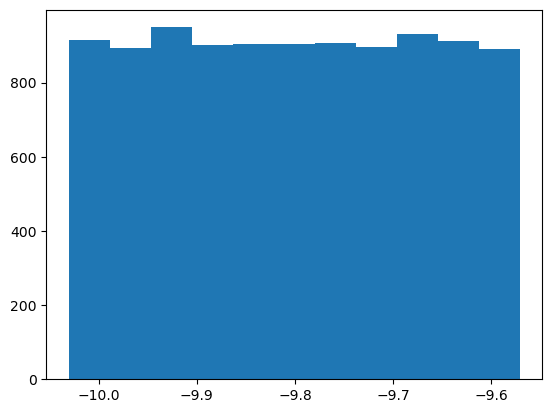

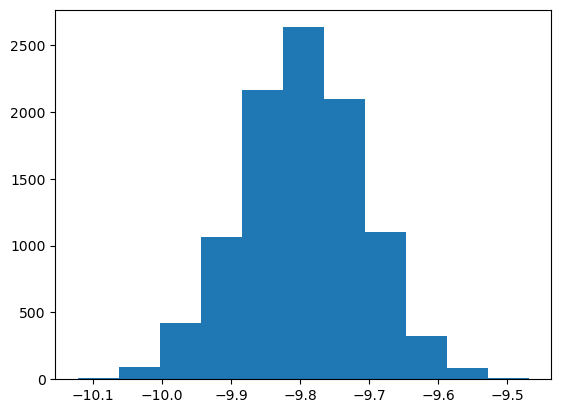

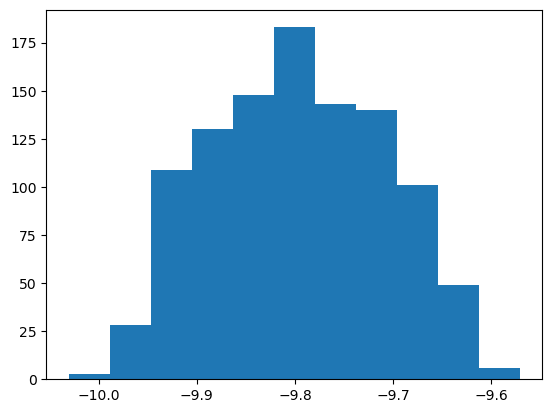

In [40]:
plt.hist(uni, bins = 11)
plt.show()
plt.hist(normal, bins = 11)
plt.show()
plt.hist(data, bins = 11)
plt.show()

### Задача 4. Теорема Байеса
- Рассчитать вероятность того, что пациент заражет COVID-19, если известно, что тест дал положительный результат.
- Сравнить с результатом моделирования.

In [43]:
prev = 0.05 # Распространенность болезни
sens = 0.98 # Чувствительность теста
spec = 0.95 # Специфичность теста

p = (sens * prev) / (sens * prev + (1 - spec) * (1 - prev)) # Теоретическая вероятность
print(p)

0.5077720207253884


In [44]:
population = 1000000

true_pos = 0
false_pos = 0

for i in range(population):
    infected = np.random.uniform() < prev
    positive = np.random.uniform() < sens if infected else np.random.uniform() < 1 - spec
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1

p_monte_carlo = true_pos / (true_pos + false_pos)
print(p_monte_carlo)

0.5067061307281533


In [45]:
population = 1000000

true_pos = 0
false_pos = 0

for i in range(population):
    infected = np.random.uniform() < prev
    if infected:
        positive = np.random.uniform() < sens
    else:
        positive = np.random.uniform() < 1 - spec
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1

p_monte_carlo = true_pos / (true_pos + false_pos)
print(p_monte_carlo)

0.5090980889336895
